# Bank Marketing (with social/economic context)

The binary classification goal is to predict if the client will subscribe a bank term deposit (variable y).

### 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bank-additional/bank-additional/bank-additional-full.csv', delimiter=';')

In [3]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**Missing Attribute Values:** There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques. 

In [5]:
var_categorical = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", 
                  "poutcome"]
var_numerical = ["age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx",
                "euribor3m", "nr.employed"]
print(len(var_categorical), len(var_numerical))

10 10


#### Missing values

In [6]:
df.replace('unknown', np.NaN, inplace=True)

In [7]:
df.isnull().sum()/len(df)*100

age                0.000000
job                0.801204
marital            0.194231
education          4.202680
default           20.872584
housing            2.403613
loan               2.403613
contact            0.000000
month              0.000000
day_of_week        0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
euribor3m          0.000000
nr.employed        0.000000
y                  0.000000
dtype: float64

In [8]:
# Number of distinct values in variables
for i, column in enumerate(df.columns):
    print("{}. ".format(i) + str(column.title()) + ": {}". format(df[column].nunique()))

0. Age: 78
1. Job: 11
2. Marital: 3
3. Education: 7
4. Default: 2
5. Housing: 2
6. Loan: 2
7. Contact: 2
8. Month: 10
9. Day_Of_Week: 5
10. Duration: 1544
11. Campaign: 42
12. Pdays: 27
13. Previous: 8
14. Poutcome: 3
15. Emp.Var.Rate: 10
16. Cons.Price.Idx: 26
17. Cons.Conf.Idx: 26
18. Euribor3M: 316
19. Nr.Employed: 11
20. Y: 2


In [9]:
# Function to label the count on top of each bar in graph
def label_values(ax, spacing=5):
    total = 0
    for rect in ax.patches:
        total += rect.get_height()

    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing
        
        va = 'bottom'
        
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.2f}, {:.2f}".format(y_value, y_value/total*100)
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                      

## 2. Exploratory Data Analysis

### i. Univariate Analysis and Segmented Univariate Analysis

#### a. Categorical Variables

##### y (Target Variable) 

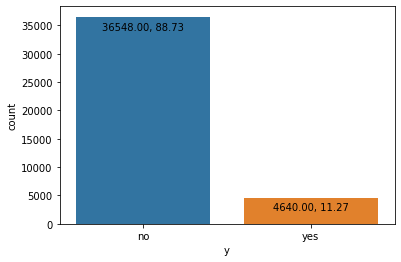

In [10]:
ax = sns.countplot(x = df["y"])  #Imbalanced dataset
label_values(ax, spacing=-15)
plt.show()

Job


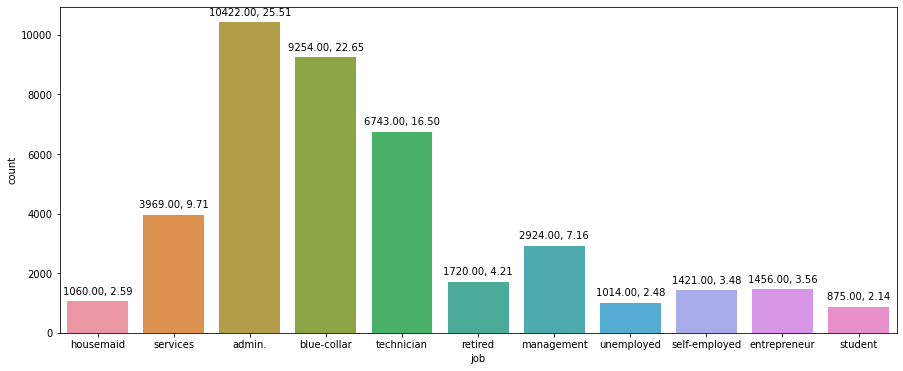

Marital


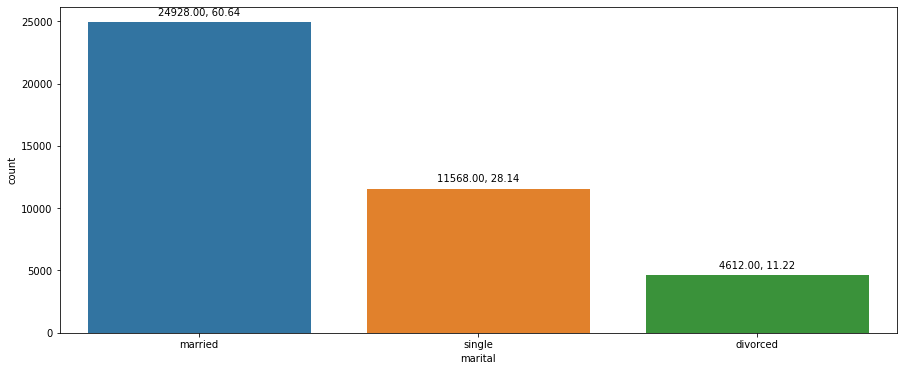

Education


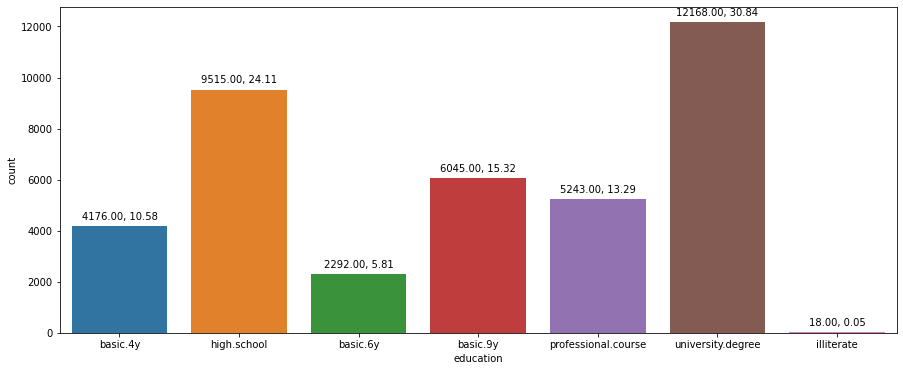

Default


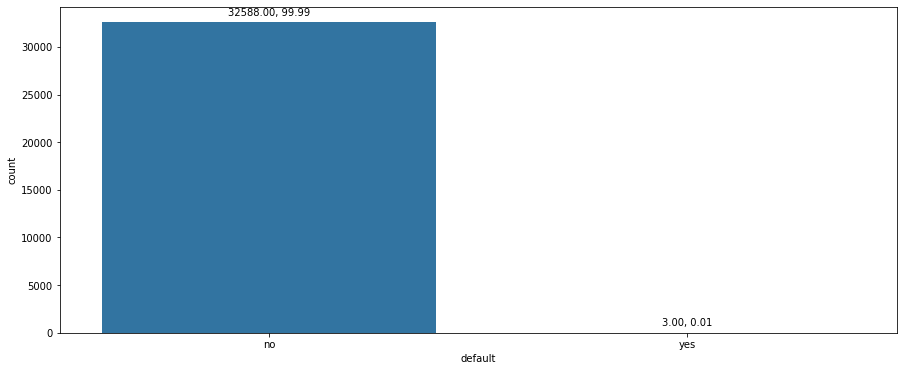

Housing


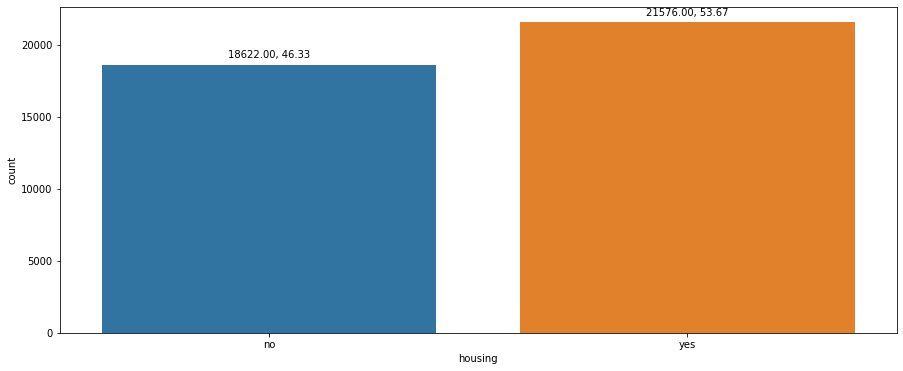

Loan


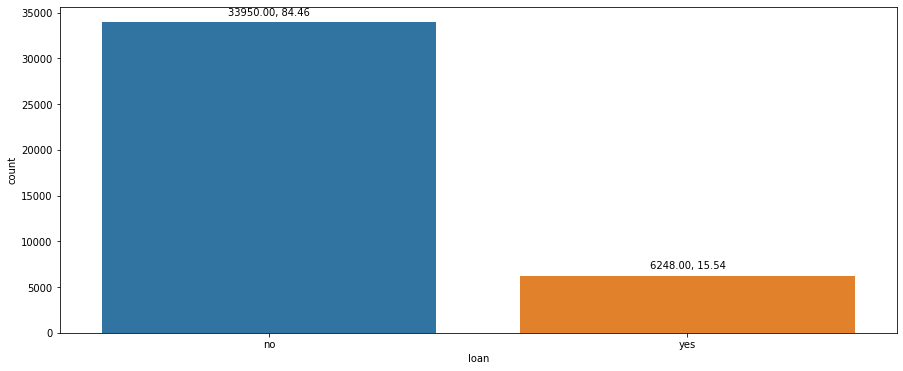

Contact


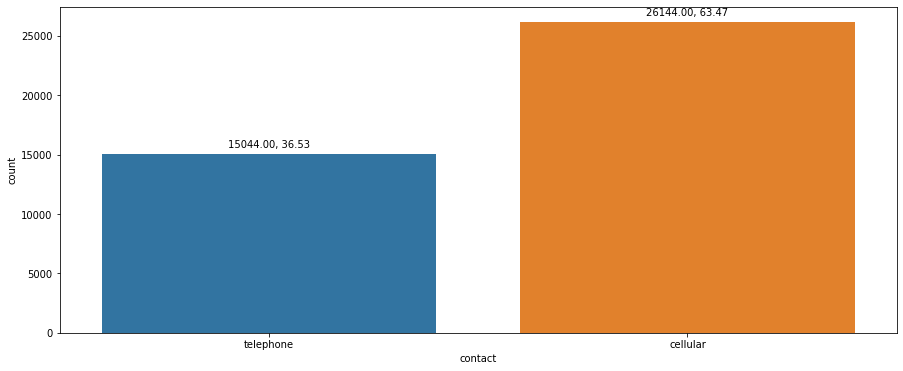

Month


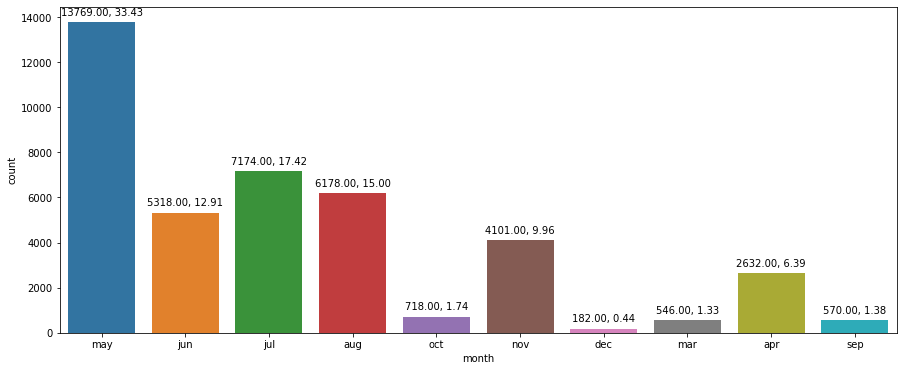

Day_Of_Week


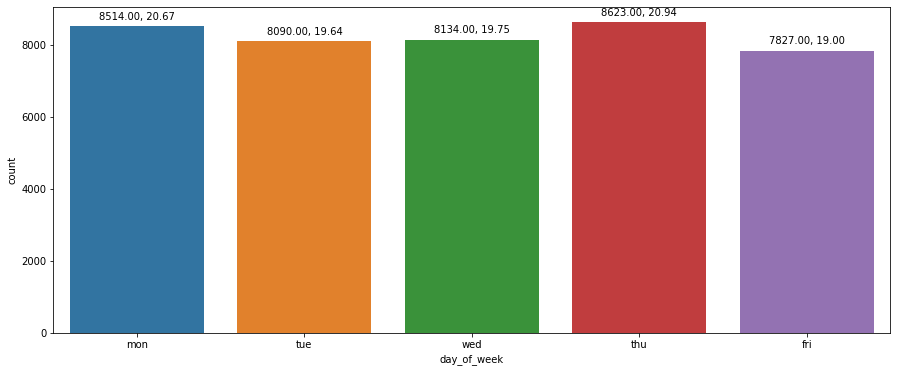

Poutcome


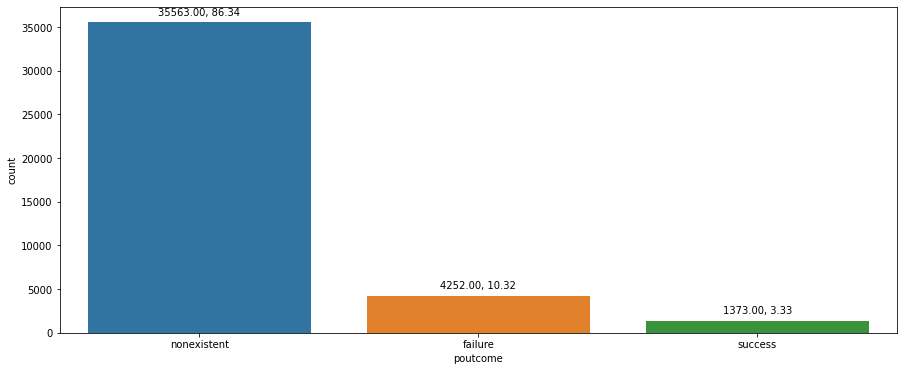

In [11]:
for column in var_categorical:
    plt.figure(figsize=(15, 6))
    print(column.title())
    ax = sns.countplot(x = df[column])
    label_values(ax)
    plt.show()

Job


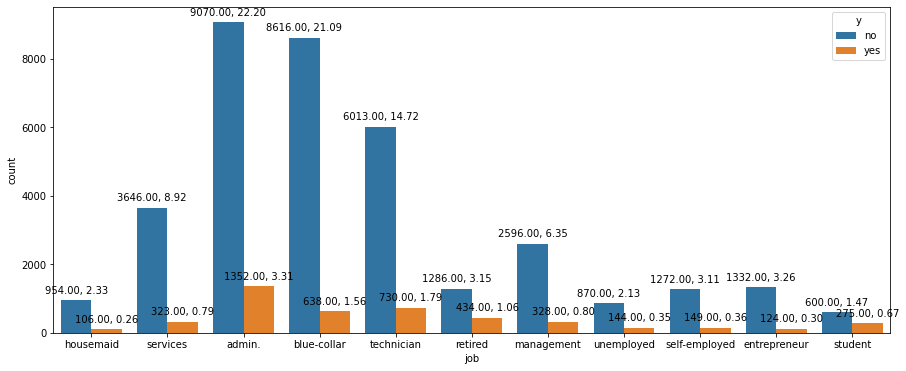

Marital


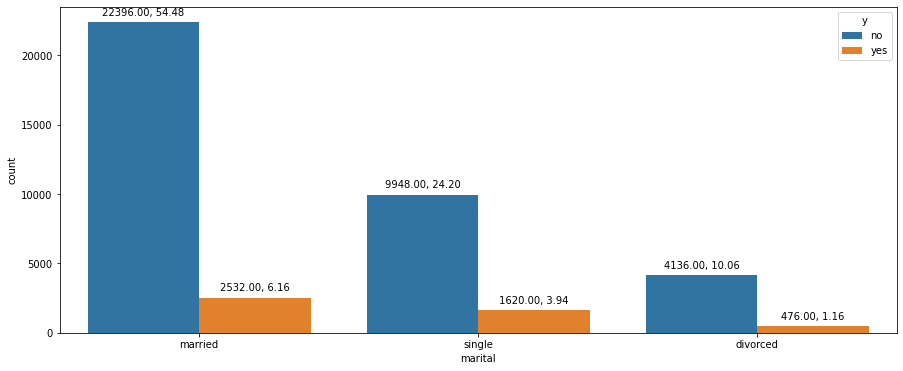

Education


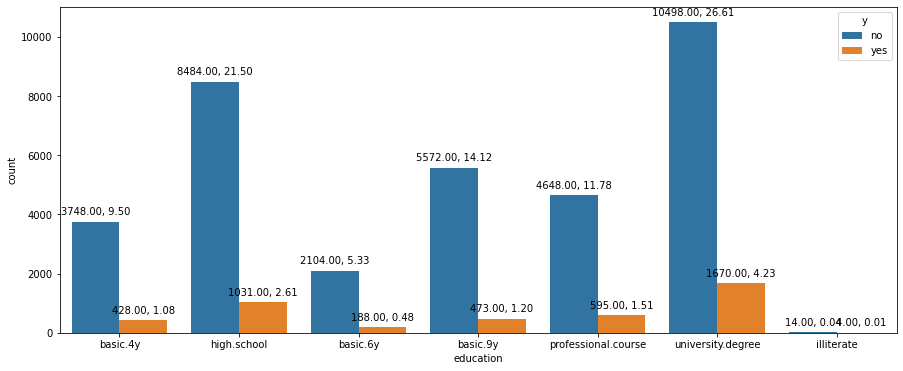

Default


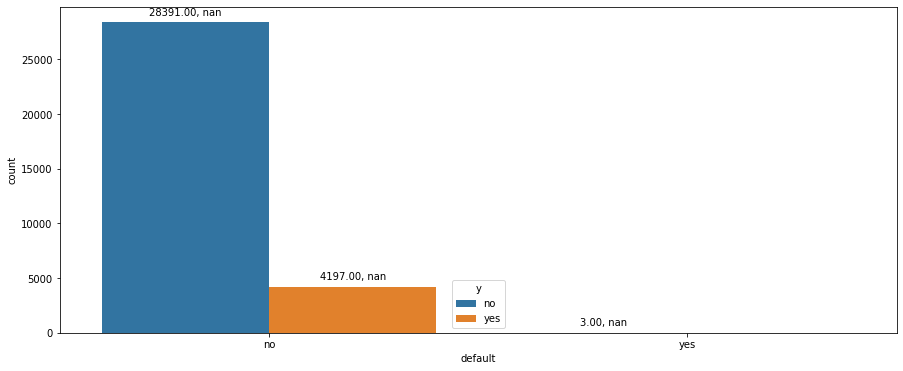

Housing


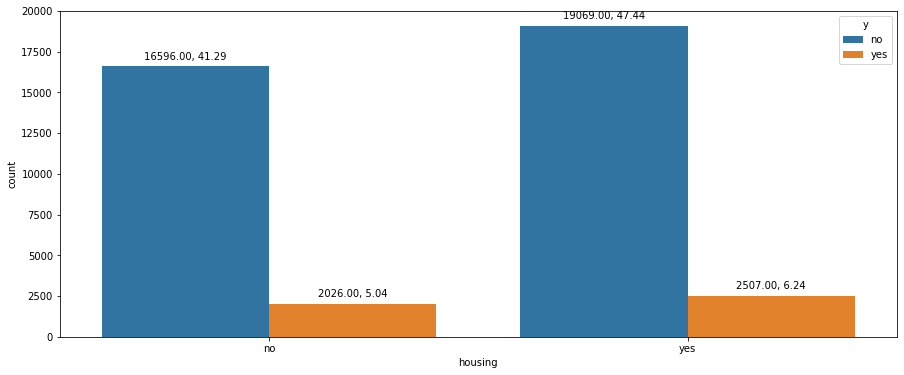

Loan


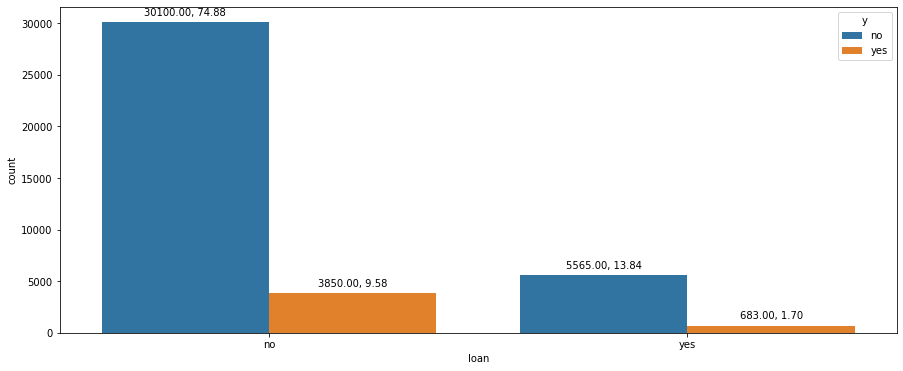

Contact


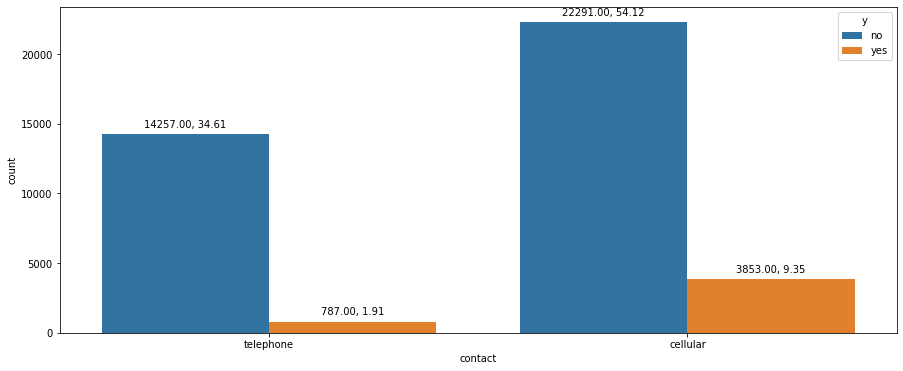

Month


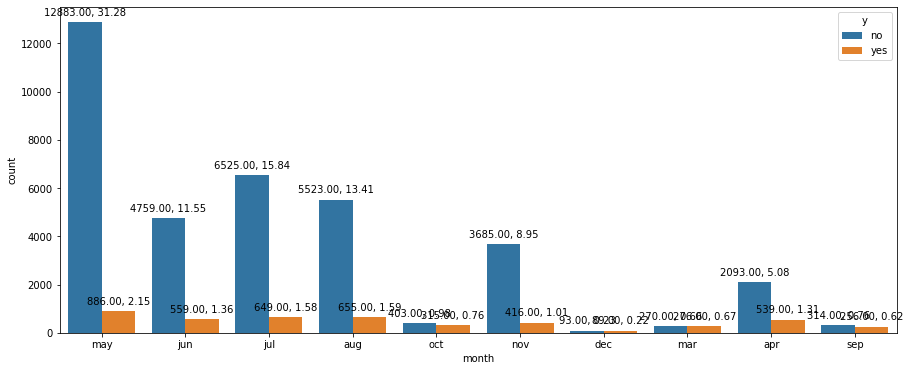

Day_Of_Week


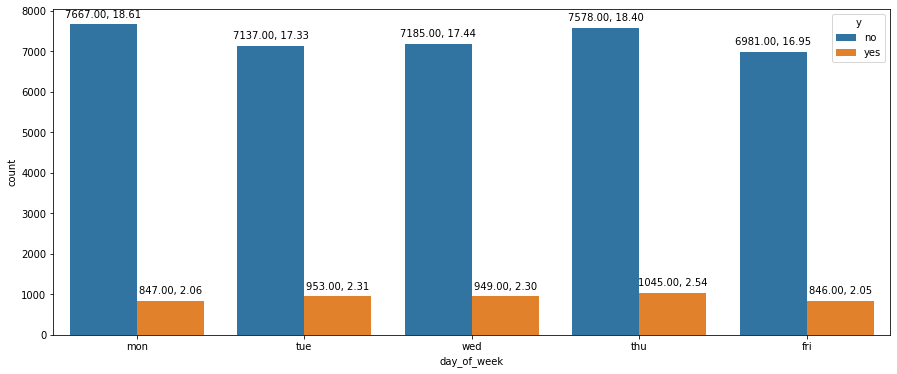

Poutcome


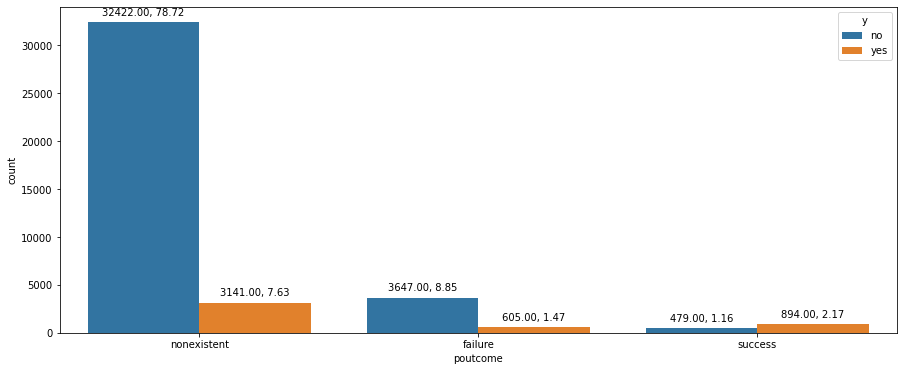

In [12]:
for column in var_categorical:
    plt.figure(figsize=(15, 6))
    print(column.title())
    ax = sns.countplot(x = df[column], hue=df["y"])
    label_values(ax)
    plt.show()

**Insights from categorical variables (based on univariate analysis)**

    1. Job: Highest Number (around 25%) of application are from admin type of job.
    2. Default: Default variable has no impact on the client subscribing for term deposit. As we can see with no as input client took the term deposit and client having credit are not taking term deposit. So we will drop this feature.
    3. Marital: Around 60% of client were approached were married. 
    4. Education: Client with university degree and high school were approached more as compare to other and they have higher success rate as well. (in terms of term deposit number)
    5. Housing: Housing loan does not have much effect on the number of term deposit purchased.
    6. Loan: We approach around 84% of client with not having personal loan. 
    7. Contact: Around 64% calls are from cellular.
    8. Month: Around 33% were approached in may and in January, Febuary we don't have data or no one was approached. Success rate was almost same in june, july and August. 
    9. day_of_week: We have 5 days collected values. There is no significant different in the number of client approached and number of people subscribed.
    10. poutcome: If a client took the term deposit last time than there is higher chances of that client subscribing to it again.

In [13]:
# Default variable has no impact on the client subscribing for term deposit.
df.drop(["default"], axis = 1, inplace=True)

In [14]:
var_categorical = list(set(var_categorical) - set(['default']))

In [15]:
df.dropna(inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38245 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             38245 non-null  int64  
 1   job             38245 non-null  object 
 2   marital         38245 non-null  object 
 3   education       38245 non-null  object 
 4   housing         38245 non-null  object 
 5   loan            38245 non-null  object 
 6   contact         38245 non-null  object 
 7   month           38245 non-null  object 
 8   day_of_week     38245 non-null  object 
 9   duration        38245 non-null  int64  
 10  campaign        38245 non-null  int64  
 11  pdays           38245 non-null  int64  
 12  previous        38245 non-null  int64  
 13  poutcome        38245 non-null  object 
 14  emp.var.rate    38245 non-null  float64
 15  cons.price.idx  38245 non-null  float64
 16  cons.conf.idx   38245 non-null  float64
 17  euribor3m       38245 non-null 

#### b. Numerical Variables

In [17]:
#### Drop the duration (as Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.)
duration = df["duration"]
df.drop(["duration"], axis = 1, inplace=True)

In [18]:
var_numerical = list(set(var_numerical) - set(['duration']))

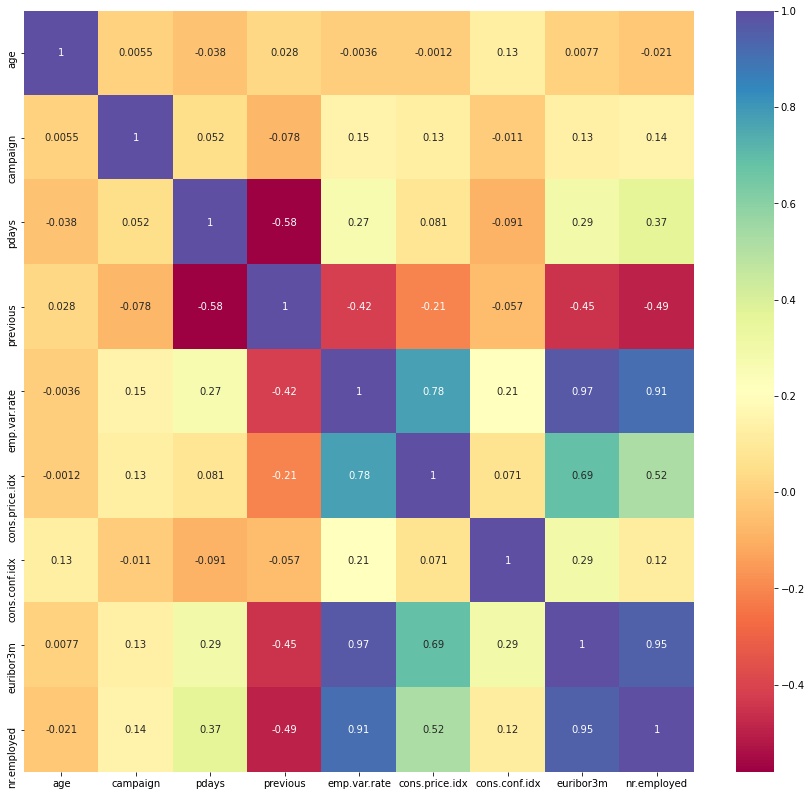

In [19]:
plt.figure(figsize=(15, 14))
sns.heatmap(df.corr(), annot=True, cmap='Spectral')
plt.show()

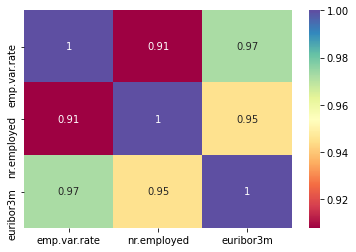

In [20]:
sns.heatmap(df[["emp.var.rate", "nr.employed", "euribor3m"]].corr(), annot=True, cmap='Spectral')
plt.show()

Positive high correlation between:
<br>    1. 'emp.var.rate' and 'nr.employed'
<br>    2. 'emp.var.rate' and 'euribor3m'
<br>    3. 'euribor3m' and 'nr.employed'

**Euribor** is the acronym for the Euro Interbank Offered Rate. This is the interest rate at which credit institutions lend money to each other, which is often referred to as **“the price of money”**.

With this we can say that 'emp.var.rate' (employment variation rate ) and 'nr.employed' (number of employees) are positively correlated with euribor.
So we will **drop 'emp.var.rate' and 'nr.employed'** as **'euribor'** also give us the price of money in current market.

In [21]:
df.drop(['emp.var.rate', 'nr.employed'], axis = 1, inplace=True)

In [22]:
var_numerical = list(set(var_numerical) - set(['emp.var.rate', 'nr.employed']))

Cons.Price.Idx


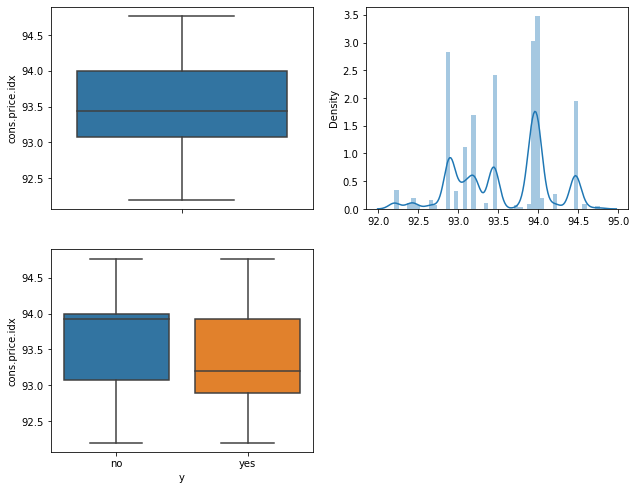

Cons.Conf.Idx


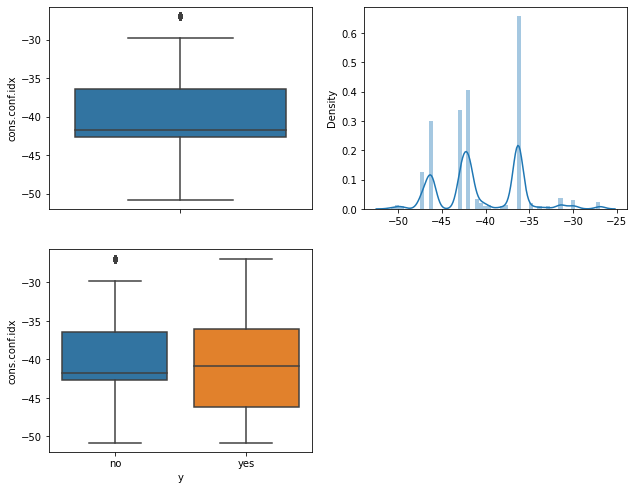

Euribor3M


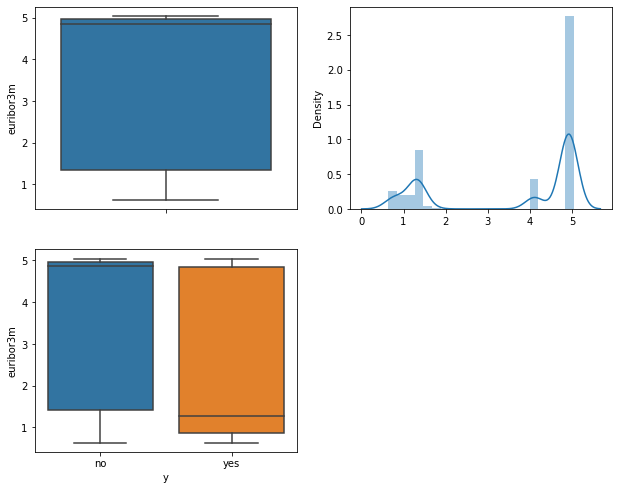

Campaign


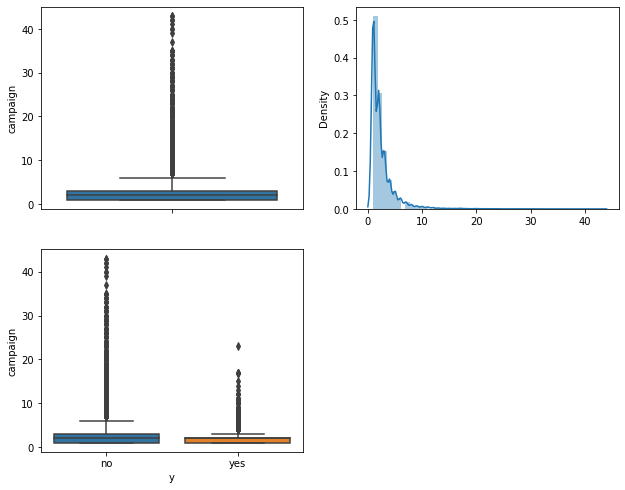

Previous


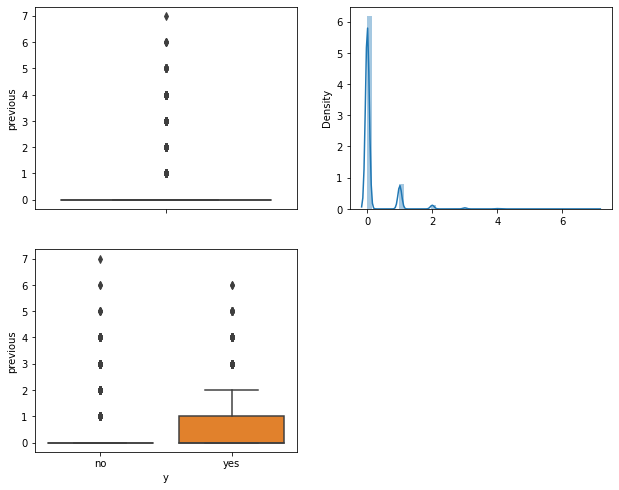

Pdays


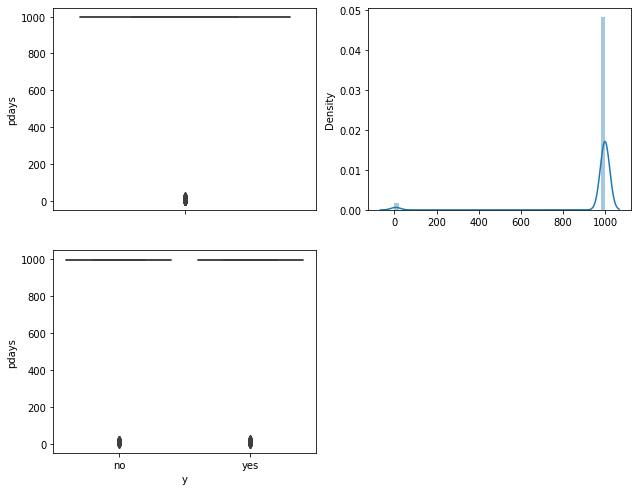

Age


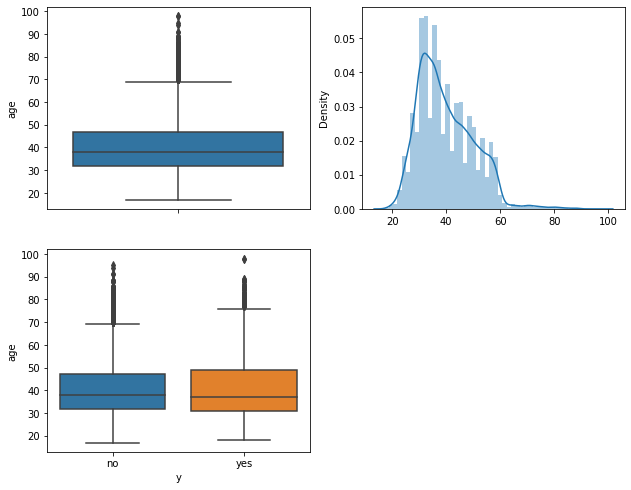

In [23]:
i = 1
for column in var_numerical:
    print(column.title())
    plt.subplots(figsize=(16, 35))
    plt.subplot(len(var_numerical) + 1, 3, i)
    sns.boxplot(y = df[column])
    i += 1
    plt.subplot(len(var_numerical) + 1, 3, i)
    sns.distplot(x = df[column])
    i += 2
    plt.subplot(len(var_numerical) + 1, 3, i)
    sns.boxplot(x = df["y"], y = df[column])
    plt.show()

In [24]:
df[var_numerical].describe()

cons.price.idx  cons.conf.idx     euribor3m      campaign  \
count    38245.000000   38245.000000  38245.000000  38245.000000   
mean        93.570313     -40.541164      3.623298      2.566662   
std          0.576367       4.623200      1.730226      2.767473   
min         92.201000     -50.800000      0.634000      1.000000   
25%         93.075000     -42.700000      1.344000      1.000000   
50%         93.444000     -41.800000      4.857000      2.000000   
75%         93.994000     -36.400000      4.961000      3.000000   
max         94.767000     -26.900000      5.045000     43.000000   

           previous         pdays           age  
count  38245.000000  38245.000000  38245.000000  
mean       0.170009    963.531651     39.860871  
std        0.487169    184.295254     10.289488  
min        0.000000      0.000000     17.000000  
25%        0.000000    999.000000     32.000000  
50%        0.000000    999.000000     38.000000  
75%        0.000000    999.000000     47.000000  
max        7.000000    999.000000     98.000000

Look into 'campaign', 'age', 'previous', 'cons.conf.idx', 'pdays'

In [25]:
print(df["campaign"].quantile(0.05), len(df[df["campaign"]<df["campaign"].quantile(0.05)] ))
print(df["campaign"].quantile(0.95), len(df[df["campaign"]>df["campaign"].quantile(0.95)] ))

1.0 0
7.0 1636


In [26]:
df1 = df[(df["campaign"] > 23) & (df["y"] == 'yes')]
len(df1[['campaign', 'y']])

0

In [27]:
df1 = df[(df["campaign"] > 8) & (df["y"] == 'yes')]
print(len(df1[['campaign', 'y']]), len(df[df["campaign"]>8]))

49 1264


In [28]:
# We will convert all the values above 10 in campaign to 10
df["campaign"] = df["campaign"].apply(lambda x: 8 if x > 8 else x)

In [29]:
print(df["age"].quantile(0.05), len(df[df["age"]<df["age"].quantile(0.05)] ))
print(df["age"].quantile(0.95), len(df[df["age"]>df["age"].quantile(0.95)] ))

26.0 1484
58.0 1435


In [30]:
print(df["previous"].quantile(0.05), len(df[df["previous"]<df["previous"].quantile(0.05)] ))
print(df["previous"].quantile(0.95), len(df[df["previous"]>2] ))

0.0 0
1.0 273


In [31]:
for i in range(1, max(df["previous"])+1):
    print(i, end = " ")
    df1 = df[(df["previous"] >= i) & (df["y"] == 'yes')]
    print(len(df1[['previous', 'y']]), len(df[df["previous"]>= i]))

1 1336 5179
2 466 945
3 160 273
4 43 78
5 13 21
6 2 5
7 0 1


In [32]:
# We will convert all the values above 2 in previous to 2
df["previous"] = df["previous"].apply(lambda x: 2 if x >= 2 else x)

In [33]:
print(df["pdays"].quantile(0.05), len(df[df["pdays"]<df["pdays"].quantile(0.05)] ))
print(df["pdays"].quantile(0.95), len(df[df["pdays"]>df["pdays"].quantile(0.95)] ))

999.0 1366
999.0 0


In [34]:
df1 = df[(df["pdays"] >= 999) & (df["y"] == 'yes')]
print(len(df1[['pdays', 'y']]), len(df[df["pdays"]>=999]))
df1 = df[(df["pdays"] < 999) & (df["y"] == 'yes')]
print(len(df1[['pdays', 'y']]), len(df[df["pdays"]<999]))
df1 = df[(df["pdays"] < 28) & (df["y"] == 'yes')]
print(len(df1[['pdays', 'y']]), len(df[df["pdays"]<28]))
df1 = df[(df["pdays"] < 20) & (df["y"] == 'yes')]
print(len(df1[['pdays', 'y']]), len(df[df["pdays"]<20]))
df1 = df[(df["pdays"] < 10) & (df["y"] == 'yes')]
print(len(df1[['pdays', 'y']]), len(df[df["pdays"]<10]))

3393 36879
865 1366
865 1366
858 1358
734 1140


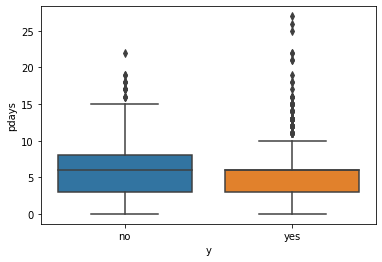

In [35]:
# Look into the pdays values which are less than 999
df1 = df[~(df["pdays"] >= 999)]
sns.boxplot(x = df1["y"], y = df1['pdays'])
plt.show()

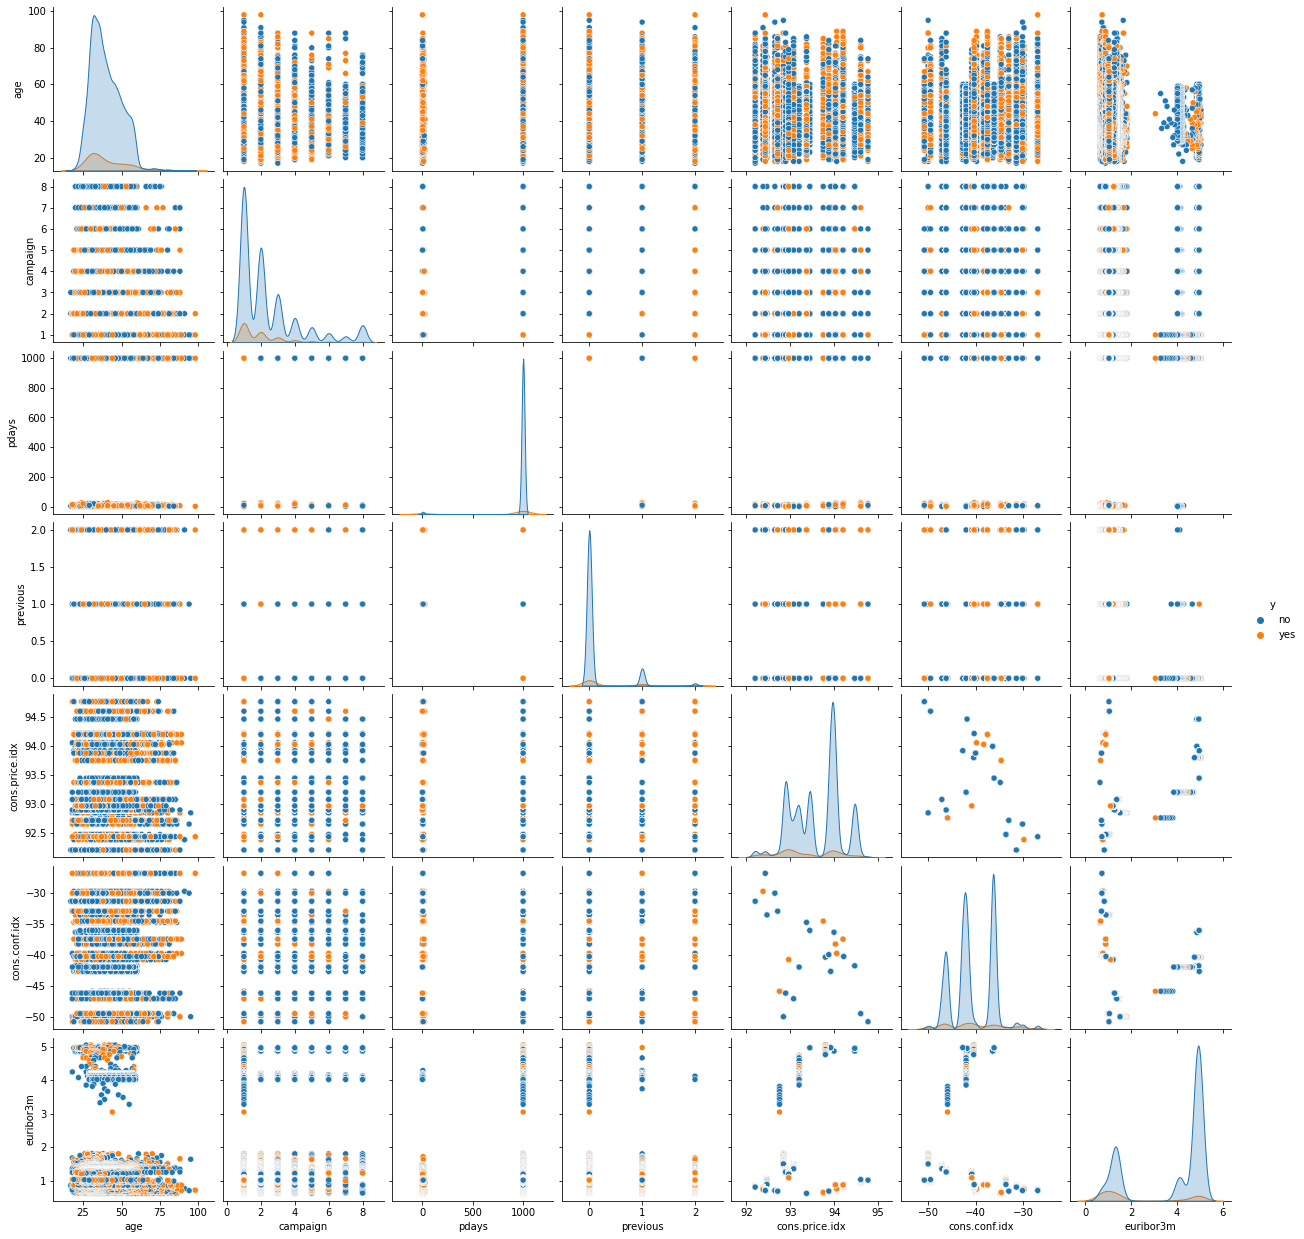

In [36]:
# visualizing numerical columns
sns.pairplot(hue='y', data = df)
plt.show()

<br> **Insights from continuous variables**
<br>
<br>
    1. Campaign: If the number of contacts performed during this campaign and for this client become more than 23 then there is very high possibility that client will not subscribe for term deposit. Even if we contact a person more than 8 times probability is still low.
    **We will drop this column as it will not be known before hand. But it is important to see that we should not contact any client more than 8 times during any campaign.**<br>
    2. Consumer price index: If this value is high then probability of client not subscribing is slightly higher. <br>
    3. Previous: If we contact client before a campaign then there is high chances that client will subscribe. We converted all the values above 2 to 2 based on the given data
    <br>
    4. Euribor 3 month rate: If this rate is high there is high chances of clients not subscribing to term deposit.<br>
    5. Pdays: If we start contacting client 1 month before campaign there is high probability of that client subscribing.

In [37]:
df.drop(['campaign'], axis = 1, inplace=True)
var_numerical = list(set(var_numerical) - set(['campaign']))

In [38]:
df.isnull().sum()/len(df)*100

age               0.0
job               0.0
marital           0.0
education         0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
pdays             0.0
previous          0.0
poutcome          0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
y                 0.0
dtype: float64

We will drop the missing values as imputing this missing values in an assumption which can effect out dataset

In [39]:
print(len(var_categorical), var_categorical)
print(len(var_numerical), var_numerical)

9 ['day_of_week', 'contact', 'education', 'loan', 'marital', 'housing', 'poutcome', 'month', 'job']
6 ['cons.price.idx', 'cons.conf.idx', 'euribor3m', 'previous', 'pdays', 'age']


In [40]:
print(df["loan"].value_counts())
print(df["housing"].value_counts())
print(df["contact"].value_counts())
print(df["y"].value_counts())

no     32286
yes     5959
Name: loan, dtype: int64
yes    20578
no     17667
Name: housing, dtype: int64
cellular     24441
telephone    13804
Name: contact, dtype: int64
no     33987
yes     4258
Name: y, dtype: int64


In [41]:
varlist = ['loan', 'housing', 'y']

df[varlist] = df[varlist].apply(lambda x: x.map({'yes':1, 'no': 0}))

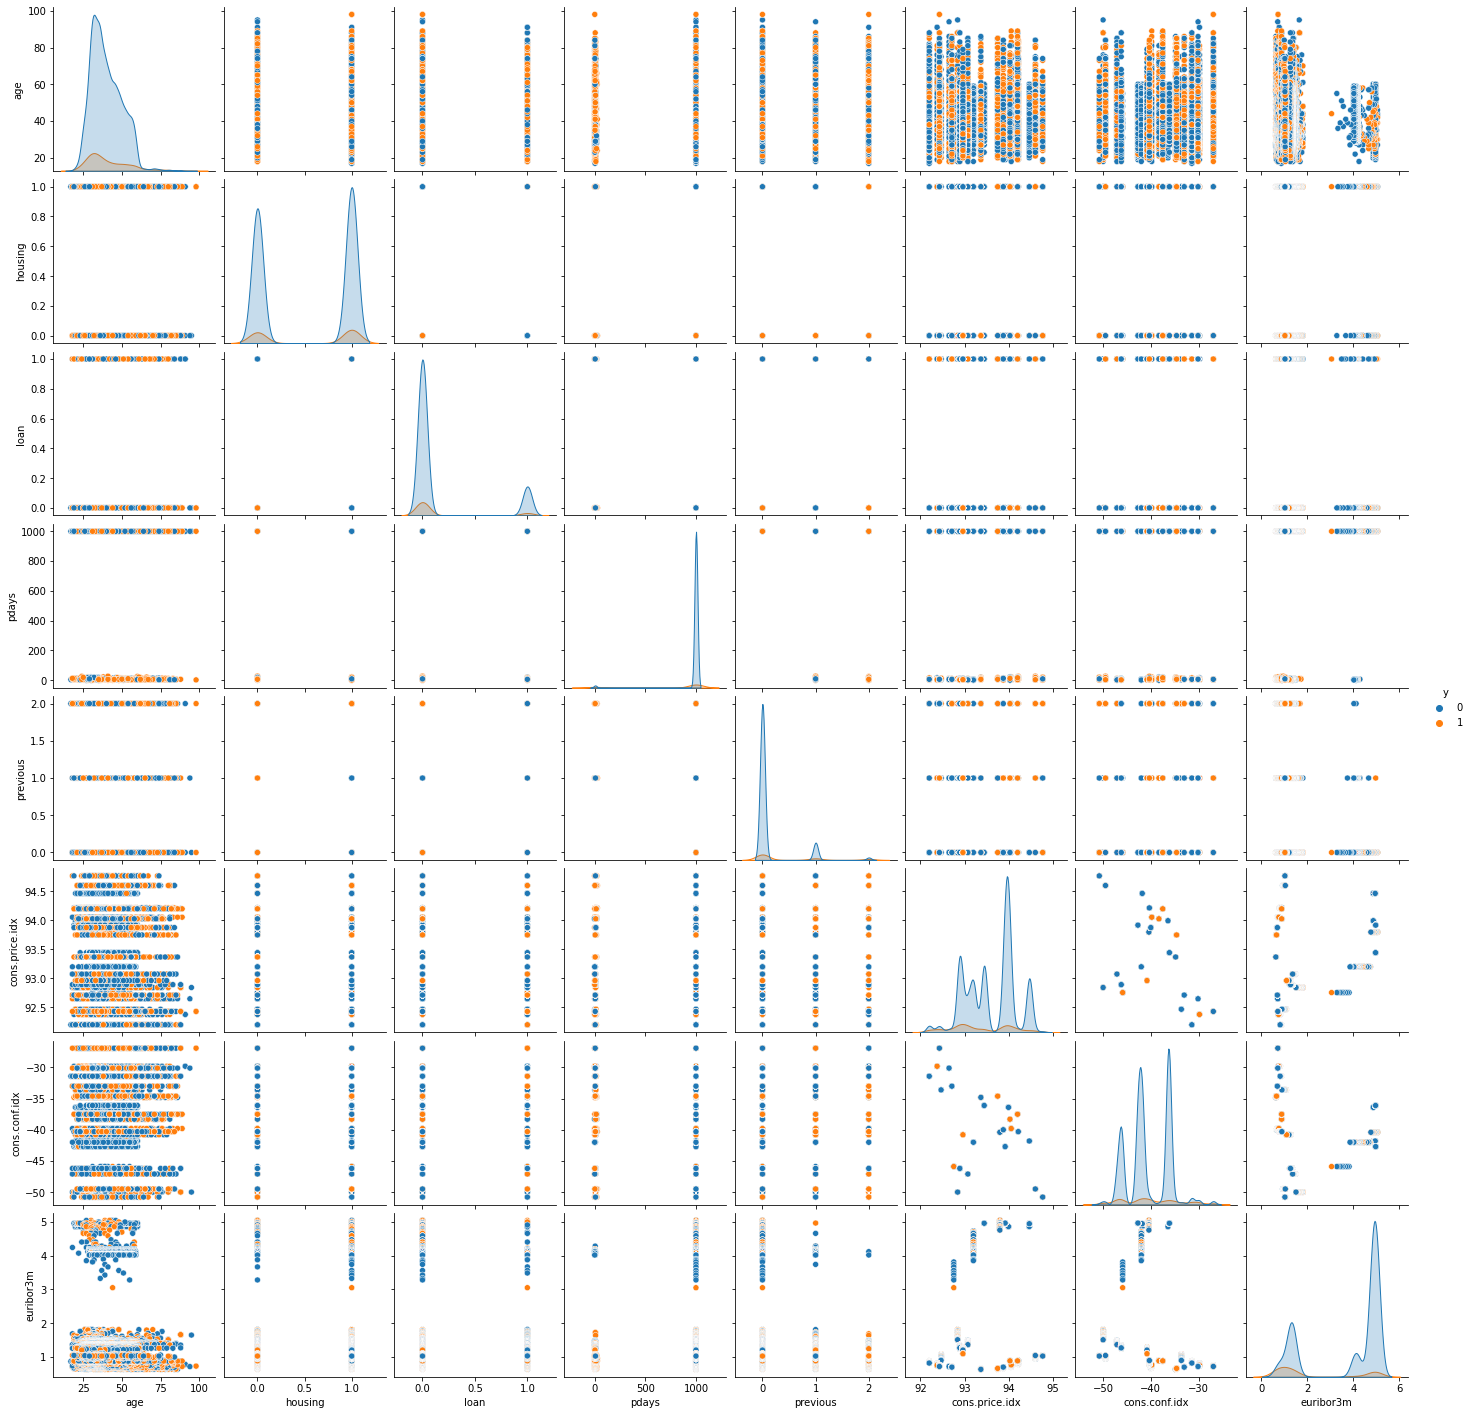

In [42]:
# visualizing numerical columns
sns.pairplot(hue='y', data = df)
plt.show()

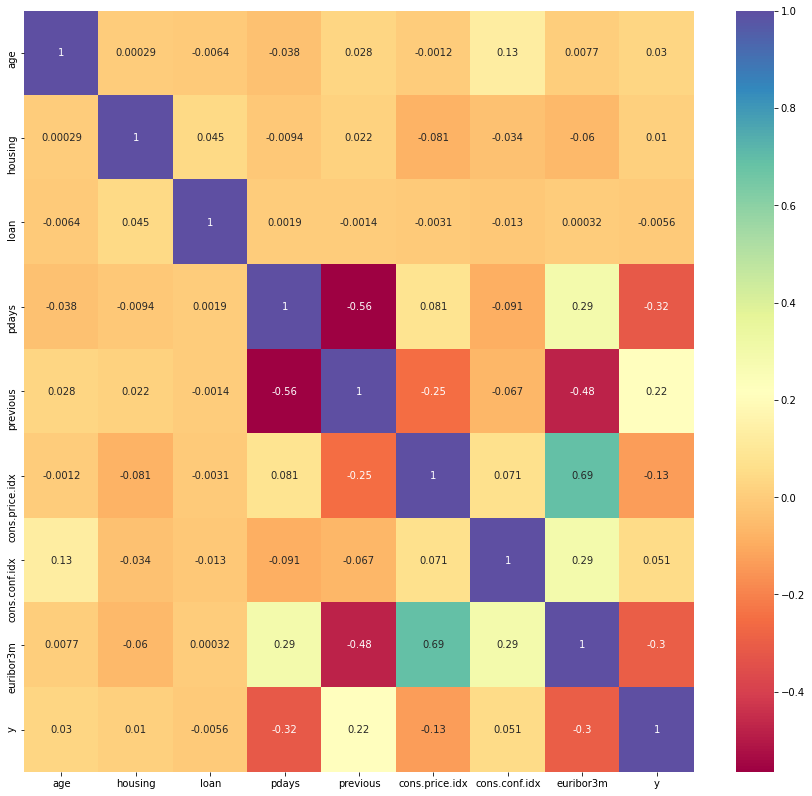

In [43]:
plt.figure(figsize=(15, 14))
sns.heatmap(df.corr(), annot=True, cmap='Spectral')
plt.show()

In [44]:
# Get the dummy variables for contact, poutcome , job, month, marital, day_of_week, education
# Let's drop the first column from  using 'drop_first = True' as first column can be derived using other columns 
# (dropping redundant column)

contact = pd.get_dummies(df.contact, drop_first=True)
poutcome = pd.get_dummies(df.poutcome, drop_first=True)
job = pd.get_dummies(df.job, drop_first=True)
month = pd.get_dummies(df.month, drop_first=True)
marital = pd.get_dummies(df.marital, drop_first=True)
day_of_week = pd.get_dummies(df.day_of_week, drop_first=True)
education = pd.get_dummies(df.education, drop_first=True)

In [45]:
# Concat the dummy columns to the dataframe
df = pd.concat([df, contact, poutcome , job, month, marital, day_of_week, education], axis=1)
df.head()

age        job  marital    education  housing  loan    contact month  \
0   56  housemaid  married     basic.4y        0     0  telephone   may   
1   57   services  married  high.school        0     0  telephone   may   
2   37   services  married  high.school        1     0  telephone   may   
3   40     admin.  married     basic.6y        0     0  telephone   may   
4   56   services  married  high.school        0     1  telephone   may   

  day_of_week  pdays  ...  mon thu  tue  wed  basic.6y  basic.9y  high.school  \
0         mon    999  ...    1   0    0    0         0         0            0   
1         mon    999  ...    1   0    0    0         0         0            1   
2         mon    999  ...    1   0    0    0         0         0            1   
3         mon    999  ...    1   0    0    0         1         0            0   
4         mon    999  ...    1   0    0    0         0         0            1   

   illiterate  professional.course  university.degree  
0           0                    0                  0  
1           0                    0                  0  
2           0                    0                  0  
3           0                    0                  0  
4           0                    0                  0  

[5 rows x 50 columns]

In [46]:
# Dropping contact, poutcome , job, month, marital, day_of_week, education as we have concatenated the dummies in our original dataframe
df.drop(['contact', 'poutcome' , 'job', 'month', 'marital', 'day_of_week', 'education'], axis = 1, inplace = True)
df.head()

age  housing  loan  pdays  previous  cons.price.idx  cons.conf.idx  \
0   56        0     0    999         0          93.994          -36.4   
1   57        0     0    999         0          93.994          -36.4   
2   37        1     0    999         0          93.994          -36.4   
3   40        0     0    999         0          93.994          -36.4   
4   56        0     1    999         0          93.994          -36.4   

   euribor3m  y  telephone  ...  mon  thu  tue  wed  basic.6y  basic.9y  \
0      4.857  0          1  ...    1    0    0    0         0         0   
1      4.857  0          1  ...    1    0    0    0         0         0   
2      4.857  0          1  ...    1    0    0    0         0         0   
3      4.857  0          1  ...    1    0    0    0         1         0   
4      4.857  0          1  ...    1    0    0    0         0         0   

   high.school  illiterate  professional.course  university.degree  
0            0           0                    0                  0  
1            1           0                    0                  0  
2            1           0                    0                  0  
3            0           0                    0                  0  
4            1           0                    0                  0  

[5 rows x 43 columns]

In [47]:
df.columns, len(df.columns)

(Index(['age', 'housing', 'loan', 'pdays', 'previous', 'cons.price.idx',
        'cons.conf.idx', 'euribor3m', 'y', 'telephone', 'nonexistent',
        'success', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
        'retired', 'self-employed', 'services', 'student', 'technician',
        'unemployed', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct',
        'sep', 'married', 'single', 'mon', 'thu', 'tue', 'wed', 'basic.6y',
        'basic.9y', 'high.school', 'illiterate', 'professional.course',
        'university.degree'],
       dtype='object'),
 43)

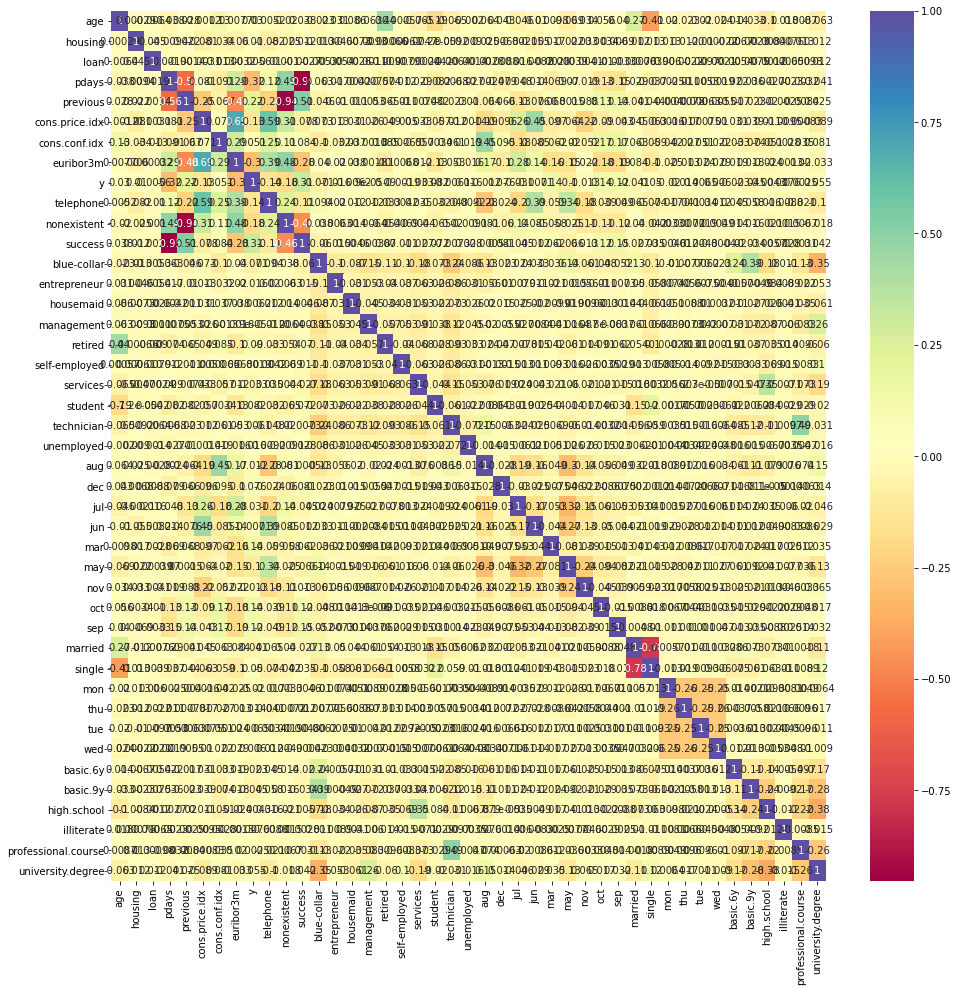

In [48]:
plt.figure(figsize=(16, 16))
sns.heatmap(df.corr(), annot=True, cmap='Spectral')
plt.show()

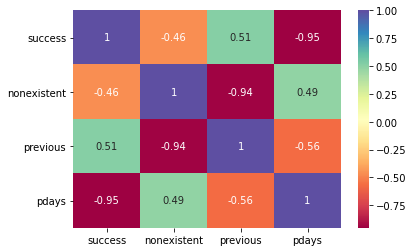

In [49]:
sns.heatmap(df[['success', 'nonexistent', 'previous', 'pdays']].corr(), annot=True, cmap='Spectral')
plt.show()

**Negative Correlation:** 
<br>    1. Previous v/s Nonexistent
<br>    2. Pdays v/s Success

In [50]:
df.drop(['previous', 'pdays'], axis = 1, inplace = True)

In [51]:
var_numerical = list(set(var_numerical) - set(['previous', 'pdays']))

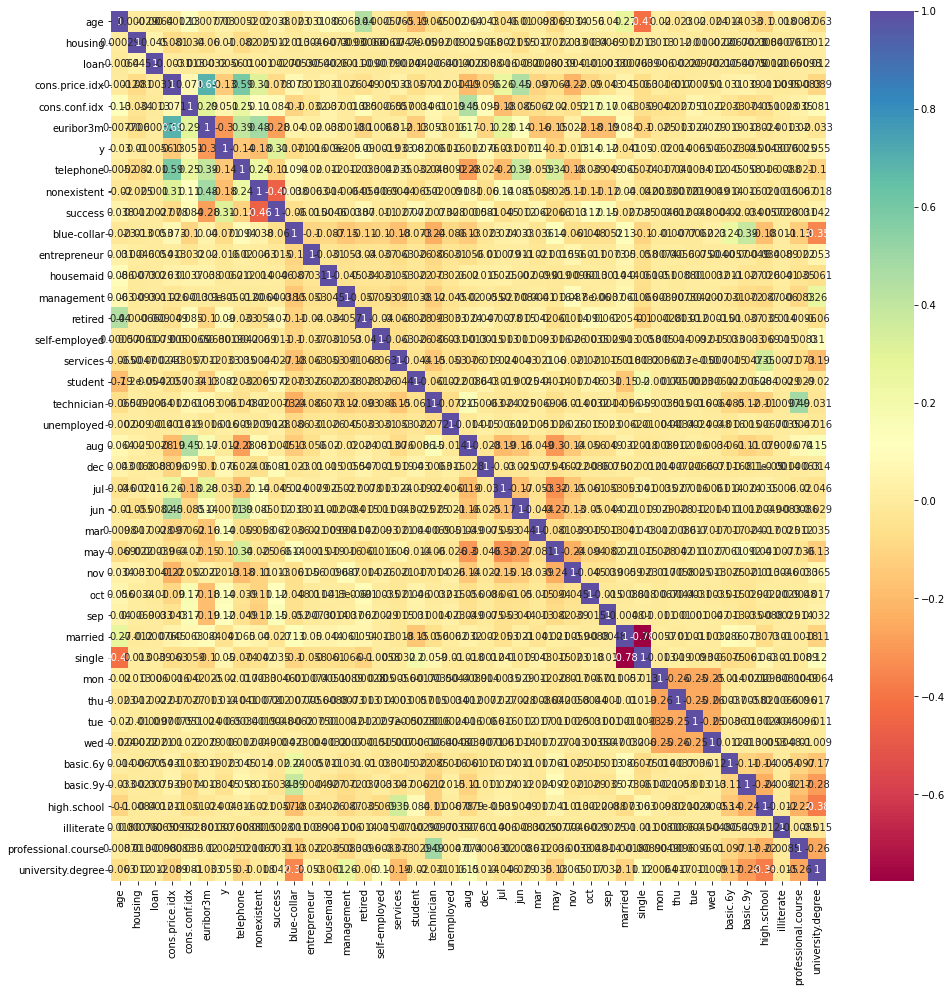

In [52]:
plt.figure(figsize=(16, 16))
sns.heatmap(df.corr(), annot=True, cmap='Spectral')
plt.show()

In [53]:
df.corr()['y']

age                    0.030130
housing                0.009996
loan                  -0.005603
cons.price.idx        -0.133084
cons.conf.idx          0.051424
euribor3m             -0.300580
y                      1.000000
telephone             -0.140866
nonexistent           -0.184489
success                0.311555
blue-collar           -0.071404
entrepreneur          -0.015897
housemaid             -0.006232
management             0.000090
retired                0.089646
self-employed         -0.001888
services              -0.032759
student                0.082182
technician            -0.006091
unemployed             0.016334
aug                   -0.012077
dec                    0.075847
jul                   -0.030556
jun                   -0.007129
mar                    0.144351
may                   -0.104725
nov                   -0.013458
oct                    0.142853
sep                    0.123514
married               -0.040845
single                 0.050106
mon     

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38245 entries, 0 to 41187
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38245 non-null  int64  
 1   housing              38245 non-null  int64  
 2   loan                 38245 non-null  int64  
 3   cons.price.idx       38245 non-null  float64
 4   cons.conf.idx        38245 non-null  float64
 5   euribor3m            38245 non-null  float64
 6   y                    38245 non-null  int64  
 7   telephone            38245 non-null  uint8  
 8   nonexistent          38245 non-null  uint8  
 9   success              38245 non-null  uint8  
 10  blue-collar          38245 non-null  uint8  
 11  entrepreneur         38245 non-null  uint8  
 12  housemaid            38245 non-null  uint8  
 13  management           38245 non-null  uint8  
 14  retired              38245 non-null  uint8  
 15  self-employed        38245 non-null 

### 3. Split Data Into Train and Test

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
# We will divide the training and testing set in 80% and 20% respectively
# We used random_state = 100 so that everytime we run it we will have same set of training and testing set
df_train, df_test = train_test_split(df, train_size = 0.8, random_state = 100)

In [57]:
print("Train Dataset: "+ str(len(df_train)) + " Test Dataset: " + str(len(df_test)))
print("Train Target Label counts: ")
print(df_train["y"].value_counts())
print("Test Target Label counts: ")
print(df_test["y"].value_counts())

Train Dataset: 30596 Test Dataset: 7649
Train Target Label counts: 
0    27144
1     3452
Name: y, dtype: int64
Test Target Label counts: 
0    6843
1     806
Name: y, dtype: int64


##### Rescaling the continuos variables

Our data is not normally distributed so we will use MinMaxScaler. It can also handle some of the outliers which we have in our data.

In [58]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [59]:
# MinMaxScaler Object
scaler = MinMaxScaler()

In [60]:
# Fit and Transform the data
# Fit will calculate our Min and Max values
# Transform will operate on standardisation function and scales our values
df_train[var_numerical] = scaler.fit_transform(df_train[var_numerical])

In [61]:
# Transform will operate on standardisation function and scales our values
df_test[var_numerical] = scaler.transform(df_test[var_numerical])

In [62]:
df_train.head()

age  housing  loan  cons.price.idx  cons.conf.idx  euribor3m  y  \
17301  0.098765        1     1        0.669135       0.338912   0.981183  0   
26425  0.407407        1     0        0.389322       0.368201   0.780322  0   
38271  0.111111        1     0        0.089634       1.000000   0.024484  0   
24709  0.382716        1     0        0.389322       0.368201   0.806393  0   
2160   0.148148        1     0        0.698753       0.602510   0.957379  0   

       telephone  nonexistent  success  ...  mon  thu  tue  wed  basic.6y  \
17301          0            1        0  ...    0    0    0    0         0   
26425          0            1        0  ...    0    1    0    0         0   
38271          0            0        0  ...    0    0    1    0         0   
24709          0            1        0  ...    1    0    0    0         0   
2160           1            1        0  ...    1    0    0    0         0   

       basic.9y  high.school  illiterate  professional.course  \
17301         0            0           0                    0   
26425         0            0           0                    0   
38271         1            0           0                    0   
24709         1            0           0                    0   
2160          0            1           0                    0   

       university.degree  
17301                  1  
26425                  1  
38271                  0  
24709                  0  
2160                   0  

[5 rows x 41 columns]

In [63]:
df_test.head()

age  housing  loan  cons.price.idx  cons.conf.idx  euribor3m  y  \
19269  0.407407        0     1        0.484412       0.615063   0.982317  0   
17957  0.358025        0     0        0.669135       0.338912   0.980957  0   
22711  0.506173        0     0        0.484412       0.615063   0.981637  0   
20420  0.395062        1     0        0.484412       0.615063   0.982090  0   
38658  0.246914        0     0        0.174591       0.866109   0.019270  0   

       telephone  nonexistent  success  ...  mon  thu  tue  wed  basic.6y  \
19269          0            1        0  ...    0    0    0    1         0   
17957          0            1        0  ...    0    0    1    0         0   
22711          0            1        0  ...    0    0    0    0         0   
20420          0            1        0  ...    0    0    1    0         1   
38658          0            0        0  ...    0    0    0    1         0   

       basic.9y  high.school  illiterate  professional.course  \
19269         0            1           0                    0   
17957         0            0           0                    0   
22711         0            1           0                    0   
20420         0            0           0                    0   
38658         0            1           0                    0   

       university.degree  
19269                  0  
17957                  1  
22711                  0  
20420                  0  
38658                  0  

[5 rows x 41 columns]

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38245 entries, 0 to 41187
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38245 non-null  int64  
 1   housing              38245 non-null  int64  
 2   loan                 38245 non-null  int64  
 3   cons.price.idx       38245 non-null  float64
 4   cons.conf.idx        38245 non-null  float64
 5   euribor3m            38245 non-null  float64
 6   y                    38245 non-null  int64  
 7   telephone            38245 non-null  uint8  
 8   nonexistent          38245 non-null  uint8  
 9   success              38245 non-null  uint8  
 10  blue-collar          38245 non-null  uint8  
 11  entrepreneur         38245 non-null  uint8  
 12  housemaid            38245 non-null  uint8  
 13  management           38245 non-null  uint8  
 14  retired              38245 non-null  uint8  
 15  self-employed        38245 non-null 

#### Dividing into X and Y sets for the model building

In [65]:
# Divide the train data into X and y

y_train = df_train.pop('y')
X_train = df_train

In [66]:
# Divide the test data into X and y

y_test = df_test.pop('y')
X_test = df_test

In [67]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((30596, 40), (30596,), (7649, 40), (7649,))

## 4. Model Building 

We will user AUC for performance metrics as the target class is imbalanced.

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [69]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [70]:
from sklearn import metrics

In [71]:
# Draw ROC curve from training and test data probability
def draw_roc( train_actual, train_probs, test_actual, test_probs ):
    train_fpr, train_tpr, train_thresholds = metrics.roc_curve( train_actual, train_probs,
                                              drop_intermediate = False )
    test_fpr, test_tpr, test_thresholds = metrics.roc_curve( test_actual, test_probs,
                                              drop_intermediate = False )
    train_auc_score = metrics.roc_auc_score( train_actual, train_probs )
    test_auc_score = metrics.roc_auc_score( test_actual, test_probs )
    plt.figure(figsize=(5, 5))
    plt.plot( train_fpr, train_tpr, label='ROC curve (area = %0.2f)' % train_auc_score )
    plt.plot( test_fpr, test_tpr, label='ROC curve (area = %0.2f)' % test_auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [72]:
# Train model using hyperparmeter tuning
def training_model_hyperparameter(model, scoring, params_grid, X_train, y_train):
    folds = StratifiedKFold(n_splits = 10, shuffle = True, random_state=100)

    grid = GridSearchCV(estimator = model, scoring=scoring, param_grid = params_grid, cv = folds, 
                           verbose=0, return_train_score=True, n_jobs=3)
    grid.fit(X_train, y_train)
    return grid

In [73]:
# Predict values and propability of training and testing data
def prediction_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_train_pred_prob = model.predict_proba(X_train)[:, 1]
    y_test_pred = model.predict(X_test)
    y_test_pred_prob = model.predict_proba(X_test)[:, 1]
    return y_train_pred, y_train_pred_prob, y_test_pred, y_test_pred_prob

### i. Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression

#### a. Train Model

In [75]:
logreg = LogisticRegression(solver='lbfgs', random_state = 100)
logreg = logreg.fit(X_train, y_train)

In [76]:
y_train_pred, y_train_pred_prob, y_test_pred,y_test_pred_prob= prediction_model(logreg, X_train, y_train, X_test, y_test)

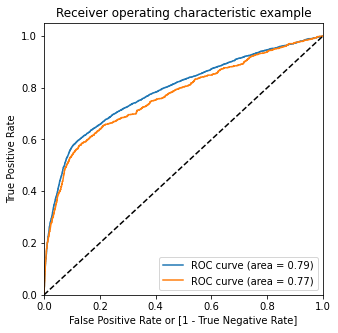

In [77]:
draw_roc(y_train, y_train_pred_prob, y_test, y_test_pred_prob)

In [78]:
print("Accuracy train: ", accuracy_score(y_train, y_train_pred))
print("Accuracy test: ", accuracy_score(y_test, y_test_pred))

Accuracy train:  0.899660086285789
Accuracy test:  0.9039090077134266


#### b. Feature Selection Using RFE with 20 Features

In [79]:
from sklearn.feature_selection import RFE

In [80]:
logreg_rfe20 = LogisticRegression(random_state = 100)

In [81]:
rfe20 = RFE(logreg_rfe20, n_features_to_select = 20)
rfe20 = rfe20.fit(X_train, y_train)

In [82]:
# Column name, RFE is True/False, Ranking of column
print(list(zip(X_train, rfe20.support_,rfe20.ranking_)))
# Columns with RFE Support as True
col = X_train.columns[rfe20.support_]
print(len(col), col)
# Columns with RFE Support as False
X_train.columns[~rfe20.support_]

[('age', True, 1), ('housing', False, 9), ('loan', False, 5), ('cons.price.idx', True, 1), ('cons.conf.idx', True, 1), ('euribor3m', True, 1), ('telephone', True, 1), ('nonexistent', True, 1), ('success', True, 1), ('blue-collar', True, 1), ('entrepreneur', False, 13), ('housemaid', True, 1), ('management', False, 17), ('retired', True, 1), ('self-employed', False, 21), ('services', True, 1), ('student', True, 1), ('technician', False, 18), ('unemployed', False, 20), ('aug', False, 8), ('dec', True, 1), ('jul', True, 1), ('jun', True, 1), ('mar', True, 1), ('may', True, 1), ('nov', False, 7), ('oct', True, 1), ('sep', False, 6), ('married', False, 19), ('single', False, 10), ('mon', True, 1), ('thu', False, 11), ('tue', False, 12), ('wed', False, 2), ('basic.6y', False, 16), ('basic.9y', False, 4), ('high.school', False, 14), ('illiterate', True, 1), ('professional.course', False, 15), ('university.degree', False, 3)]
20 Index(['age', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'te

Index(['housing', 'loan', 'entrepreneur', 'management', 'self-employed',
       'technician', 'unemployed', 'aug', 'nov', 'sep', 'married', 'single',
       'thu', 'tue', 'wed', 'basic.6y', 'basic.9y', 'high.school',
       'professional.course', 'university.degree'],
      dtype='object')

In [83]:
# Creating X_train_rfe dataframe with RFE selected variables

X_train_rfe20 = X_train[col]
X_test_rfe20 = X_test[col]

In [84]:
logreg_rfe20 = LogisticRegression(random_state = 100)
logreg_rfe20 = logreg_rfe20.fit(X_train_rfe20, y_train)

In [85]:
y_train_pred_rfe20, y_train_pred_rfe20_prob, y_test_pred_rfe20, y_test_pred_rfe20_prob = prediction_model(logreg_rfe20, X_train_rfe20, y_train, X_test_rfe20, y_test)

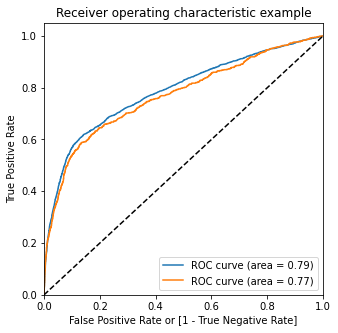

In [86]:
draw_roc(y_train, y_train_pred_rfe20_prob, y_test, y_test_pred_rfe20_prob)

In [87]:
print("Accuracy train: ", accuracy_score(y_train, y_train_pred_rfe20))
print("Accuracy test: ", accuracy_score(y_test, y_test_pred_rfe20))

Accuracy train:  0.8997908223297163
Accuracy test:  0.9039090077134266


#### c. Training model with hyperparameter Tuning

In [88]:
lr_model = LogisticRegression()

In [89]:
# Create the param grid for logistic regression
lr_param_grid = {
    'max_iter': [75, 100, 125],
    'penalty': ['l1', 'l2'],
    'C': [0.5 , 1, 1.5],
    'solver': ['liblinear', 'lbfgs']
}
print(lr_param_grid)

{'max_iter': [75, 100, 125], 'penalty': ['l1', 'l2'], 'C': [0.5, 1, 1.5], 'solver': ['liblinear', 'lbfgs']}


In [90]:
lr_grid = training_model_hyperparameter(lr_model, 'roc_auc', lr_param_grid, X_train, y_train)

In [91]:
y_train_pred_lr, y_train_pred_lr_prob, y_test_pred_lr, y_test_pred_lr_prob = \
                                    prediction_model(lr_grid, X_train, y_train, X_test, y_test)

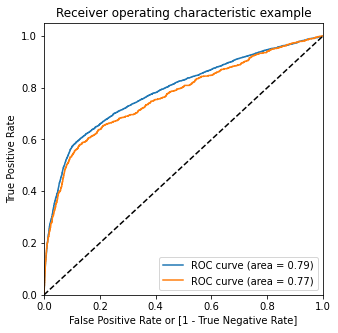

In [92]:
draw_roc(y_train, y_train_pred_lr_prob, y_test, y_test_pred_lr_prob)

In [93]:
lr_grid.best_params_

{'C': 0.5, 'max_iter': 125, 'penalty': 'l1', 'solver': 'liblinear'}

In [94]:
cv_results = pd.DataFrame(lr_grid.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        0.455081      0.069881         0.005376        0.001581     0.5   
1        0.010502      0.002653         0.000000        0.000000     0.5   
2        0.200502      0.029163         0.005933        0.001981     0.5   
3        0.427840      0.032764         0.005940        0.001464     0.5   
4        0.491325      0.105471         0.005675        0.001242     0.5   
5        0.012319      0.002315         0.000000        0.000000     0.5   
6        0.201209      0.042713         0.006229        0.002098     0.5   
7        0.404192      0.071946         0.005812        0.001592     0.5   
8        0.469937      0.081357         0.004913        0.001361     0.5   
9        0.007141      0.000941         0.000000        0.000000     0.5   
10       0.182120      0.023056         0.004888        0.000921     0.5   
11       0.422885      0.062986         0.005914        0.002326     0.5   
12       0.508348      0.094839         0.005187        0.001035       1   
13       0.007104      0.001210         0.000000        0.000000       1   
14       0.195349      0.042155         0.005069        0.001588       1   
15       0.418900      0.073639         0.006010        0.001838       1   
16       0.536788      0.095500         0.005151        0.000839       1   
17       0.007289      0.001085         0.000000        0.000000       1   
18       0.209263      0.039664         0.005759        0.002348       1   
19       0.409374      0.074855         0.005551        0.001541       1   
20       0.557604      0.056621         0.004571        0.000766       1   
21       0.009120      0.001725         0.000000        0.000000       1   
22       0.217027      0.030154         0.006039        0.002004       1   
23       0.441242      0.069005         0.006722        0.002216       1   
24       0.561921      0.094130         0.005127        0.001015     1.5   
25       0.007536      0.001199         0.000000        0.000000     1.5   
26       0.253389      0.048465         0.006840        0.002586     1.5   
27       0.447305      0.075071         0.005293        0.001426     1.5   
28       0.535044      0.070322         0.005270        0.001280     1.5   
29       0.007549      0.000993         0.000000        0.000000     1.5   
30       0.222220      0.037478         0.006677        0.002320     1.5   
31       0.419804      0.062636         0.005948        0.001684     1.5   
32       0.537246      0.120700         0.005419        0.001212     1.5   
33       0.009288      0.001939         0.000000        0.000000     1.5   
34       0.209787      0.052669         0.005377        0.001413     1.5   
35       0.423212      0.065963         0.005704        0.001783     1.5   

   param_max_iter param_penalty param_solver  \
0              75            l1    liblinear   
1              75            l1        lbfgs   
2              75            l2    liblinear   
3              75            l2        lbfgs   
4             100            l1    liblinear   
5             100            l1        lbfgs   
6             100            l2    liblinear   
7             100            l2        lbfgs   
8             125            l1    liblinear   
9             125            l1        lbfgs   
10            125            l2    liblinear   
11            125            l2        lbfgs   
12             75            l1    liblinear   
13             75            l1        lbfgs   
14             75            l2    liblinear   
15             75            l2        lbfgs   
16            100            l1    liblinear   
17            100            l1        lbfgs   
18            100            l2    liblinear   
19            100            l2        lbfgs   
20            125            l1    liblinear   
21            125            l1        lbfgs   
22            125            l2    liblinear   
23            125            l2        

In [95]:
cv_results[["param_max_iter", "param_penalty", "param_solver", "mean_train_score","mean_test_score"]]

param_max_iter param_penalty param_solver  mean_train_score  \
0              75            l1    liblinear          0.788547   
1              75            l1        lbfgs               NaN   
2              75            l2    liblinear          0.788843   
3              75            l2        lbfgs          0.788814   
4             100            l1    liblinear          0.788546   
5             100            l1        lbfgs               NaN   
6             100            l2    liblinear          0.788843   
7             100            l2        lbfgs          0.788814   
8             125            l1    liblinear          0.788547   
9             125            l1        lbfgs               NaN   
10            125            l2    liblinear          0.788843   
11            125            l2        lbfgs          0.788814   
12             75            l1    liblinear          0.788694   
13             75            l1        lbfgs               NaN   
14             75            l2    liblinear          0.788834   
15             75            l2        lbfgs          0.788815   
16            100            l1    liblinear          0.788694   
17            100            l1        lbfgs               NaN   
18            100            l2    liblinear          0.788834   
19            100            l2        lbfgs          0.788815   
20            125            l1    liblinear          0.788694   
21            125            l1        lbfgs               NaN   
22            125            l2    liblinear          0.788834   
23            125            l2        lbfgs          0.788815   
24             75            l1    liblinear          0.788737   
25             75            l1        lbfgs               NaN   
26             75            l2    liblinear          0.788830   
27             75            l2        lbfgs          0.788812   
28            100            l1    liblinear          0.788737   
29            100            l1        lbfgs               NaN   
30            100            l2    liblinear          0.788830   
31            100            l2        lbfgs          0.788812   
32            125            l1    liblinear          0.788738   
33            125            l1        lbfgs               NaN   
34            125            l2    liblinear          0.788830   
35            125            l2        lbfgs          0.788812   

    mean_test_score  
0          0.785523  
1               NaN  
2          0.785323  
3          0.785271  
4          0.785507  
5               NaN  
6          0.785323  
7          0.785271  
8          0.785525  
9               NaN  
10         0.785323  
11         0.785271  
12         0.785292  
13              NaN  
14         0.785258  
15         0.785243  
16         0.785301  
17              NaN  
18         0.785258  
19         0.785243  
20         0.785302  
21              NaN  
22         0.785258  
23         0.785243  
24         0.785254  
25              NaN  
26         0.785239  
27         0.785210  
28         0.785249  
29              NaN  
30         0.785239  
31         0.785211  
32         0.785252  
33              NaN  
34         0.785239  
35         0.785211

In [96]:
print("Accuracy train: ", accuracy_score(y_train, y_train_pred_lr))
print("Accuracy test: ", accuracy_score(y_test, y_test_pred_lr))

Accuracy train:  0.899660086285789
Accuracy test:  0.9041704798012812



### ii. Random Forest Classifier

#### Train Random Forest Classifier model with hyperparameter tuning

In [97]:
# Create the param grid for random forest
param_grid_rf = [{'n_estimators': [30, 50, 75, 100],
               'max_depth': [5, 6, 7, 8, 9, 10],
               'max_features': [10, 15, 25, 30]}]
print(param_grid_rf)

[{'n_estimators': [30, 50, 75, 100], 'max_depth': [5, 6, 7, 8, 9, 10], 'max_features': [10, 15, 25, 30]}]


In [98]:
rf_model = RandomForestClassifier()

In [99]:
rf_grid = training_model_hyperparameter(rf_model, 'roc_auc', param_grid_rf, X_train, y_train)

In [100]:
rf_grid.best_params_

{'max_depth': 9, 'max_features': 30, 'n_estimators': 75}

In [101]:
cv_results = pd.DataFrame(rf_grid.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.344378      0.015142         0.011751        0.000287   
1        0.576408      0.013048         0.017841        0.001765   
2        0.936913      0.044810         0.026028        0.002835   
3        1.155200      0.055902         0.029658        0.000745   
4        0.469464      0.013589         0.012420        0.000377   
..            ...           ...              ...             ...   
91       3.996434      0.090455         0.045536        0.003086   
92       1.373740      0.034506         0.016895        0.000915   
93       2.287396      0.068336         0.025865        0.001413   
94       3.445182      0.107871         0.035757        0.002279   
95       4.453409      0.304595         0.045188        0.004299   

   param_max_depth param_max_features param_n_estimators  \
0                5                 10                 30   
1                5                 10                 50   
2                5                 10                 75   
3                5                 10                100   
4                5                 15                 30   
..             ...                ...                ...   
91              10                 25                100   
92              10                 30                 30   
93              10                 30                 50   
94              10                 30                 75   
95              10                 30                100   

                                               params  split0_test_score  \
0   {'max_depth': 5, 'max_features': 10, 'n_estima...           0.813387   
1   {'max_depth': 5, 'max_features': 10, 'n_estima...           0.809970   
2   {'max_depth': 5, 'max_features': 10, 'n_estima...           0.811942   
3   {'max_depth': 5, 'max_features': 10, 'n_estima...           0.811259   
4   {'max_depth': 5, 'max_features': 15, 'n_estima...           0.813671   
..                                                ...                ...   
91  {'max_depth': 10, 'max_features': 25, 'n_estim...           0.803827   
92  {'max_depth': 10, 'max_features': 30, 'n_estim...           0.800129   
93  {'max_depth': 10, 'max_features': 30, 'n_estim...           0.804206   
94  {'max_depth': 10, 'max_features': 30, 'n_estim...           0.805473   
95  {'max_depth': 10, 'max_features': 30, 'n_estim...           0.803809   

    split1_test_score  ...  split2_train_score  split3_train_score  \
0            0.786603  ...            0.797649            0.796238   
1            0.787528  ...            0.796220            0.796358   
2            0.789457  ...            0.798072            0.796552   
3            0.789095  ...            0.796304            0.795627   
4            0.787759  ...            0.798425            0.797523   
..                ...  ...                 ...                 ...   
91           0.798391  ...            0.876597            0.869805   
92           0.791632  ...            0.876946            0.867394   
93           0.794777  ...            0.880139            0.874783   
94           0.795282  ...            0.876569            0.873596   
95           0.798709  ...            0.879193            0.876748   

    split4_train_score  split5_train_score  split6_train_score  \
0             0.795179            0.795614            0.796916   
1             0.794366            0.798362            0.797537   
2             0.794963            0.797852            0.797433   
3             0.796529            0.798607            0.798524   
4             0.795987            0.799348            0.799442   
..                 ...                 ...                 ...   
91            0.870151            0.870690            0.872518   
92            0.866562            0.872557            0.872486   
93            0.873458            0.873776            0.873809   
94            0.870682            0.873364          

In [102]:
cv_results[["param_max_depth","param_max_features","param_n_estimators","mean_train_score","mean_test_score"]]

param_max_depth param_max_features param_n_estimators  mean_train_score  \
0                5                 10                 30          0.795885   
1                5                 10                 50          0.796251   
2                5                 10                 75          0.796855   
3                5                 10                100          0.797184   
4                5                 15                 30          0.797987   
..             ...                ...                ...               ...   
91              10                 25                100          0.871720   
92              10                 30                 30          0.870946   
93              10                 30                 50          0.874942   
94              10                 30                 75          0.874558   
95              10                 30                100          0.876665   

    mean_test_score  
0          0.790559  
1          0.791453  
2          0.790826  
3          0.791870  
4          0.793774  
..              ...  
91         0.799304  
92         0.797342  
93         0.798314  
94         0.798656  
95         0.799059  

[96 rows x 5 columns]

In [103]:
y_train_pred_rf, y_train_pred_rf_prob, y_test_pred_rf, y_test_pred_rf_prob = \
                                    prediction_model(rf_grid, X_train, y_train, X_test, y_test)

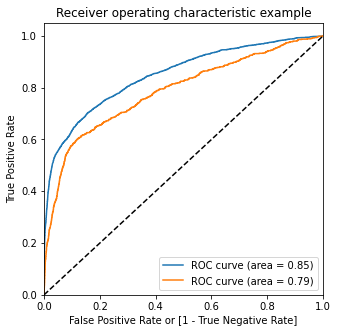

In [104]:
draw_roc(y_train, y_train_pred_rf_prob, y_test, y_test_pred_rf_prob)

In [105]:
print("Accuracy train: ", accuracy_score(y_train, y_train_pred_rf))
print("Accuracy test: ", accuracy_score(y_test, y_test_pred_rf))

Accuracy train:  0.9160020917767029
Accuracy test:  0.9044319518891358


### iii. Gradient Boosting Classifier

#### Train Gradient Boosting Classifier model with hyperparameter tuning

In [106]:
from sklearn.ensemble import GradientBoostingClassifier

In [107]:
gb_model = GradientBoostingClassifier(verbose = 1)

In [108]:
params_grid_gb = {
    "n_iter_no_change": ['None', 5, 10],
    "n_estimators": [30, 50, 75, 100],
    "learning_rate": [0.05, 0.1, 0.15]
}

In [109]:
gb_grid = training_model_hyperparameter(gb_model, 'roc_auc', params_grid_gb, X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.6498            1.39s
         2           0.6236            1.49s
         3           0.6068            1.44s
         4           0.5937            1.39s
         5           0.5848            1.37s
         6           0.5770            1.33s
         7           0.5713            1.31s
         8           0.5665            1.30s
         9           0.5633            1.26s
        10           0.5602            1.23s
        20           0.5464            0.93s
        30           0.5414            0.61s
        40           0.5384            0.30s
        50           0.5362            0.00s


In [110]:
gb_grid.best_params_

{'learning_rate': 0.15, 'n_estimators': 50, 'n_iter_no_change': 10}

In [111]:
cv_results = pd.DataFrame(gb_grid.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.040780      0.006208         0.000000        0.000000   
1        1.945463      0.081679         0.006124        0.000616   
2        1.918428      0.098458         0.007127        0.000708   
3        0.034019      0.002003         0.000000        0.000000   
4        3.215252      0.098393         0.008590        0.001217   
5        3.350208      0.163852         0.008849        0.001833   
6        0.043158      0.006939         0.000000        0.000000   
7        4.797359      0.491843         0.010051        0.001586   
8        4.853519      0.170048         0.009725        0.001498   
9        0.041981      0.003641         0.000000        0.000000   
10       5.820983      0.628807         0.009958        0.001331   
11       6.262441      0.392042         0.010808        0.000715   
12       0.040084      0.001710         0.000000        0.000000   
13       1.981838      0.122151         0.008859        0.002823   
14       1.970196      0.141524         0.007651        0.000628   
15       0.042618      0.002861         0.000000        0.000000   
16       3.213083      0.225949         0.008710        0.000729   
17       3.302769      0.139047         0.009123        0.000815   
18       0.042862      0.002617         0.000000        0.000000   
19       3.976125      0.532848         0.009790        0.001577   
20       4.917172      0.479386         0.009549        0.001256   
21       0.056961      0.018255         0.000000        0.000000   
22       4.509770      0.798195         0.008823        0.001745   
23       4.118249      1.031749         0.008186        0.000549   
24       0.039602      0.005938         0.000000        0.000000   
25       1.747621      0.129949         0.006505        0.000264   
26       1.863631      0.066025         0.007338        0.001327   
27       0.038119      0.001302         0.000000        0.000000   
28       2.691440      0.479890         0.008156        0.001843   
29       3.119993      0.375476         0.009266        0.002419   
30       0.043213      0.005387         0.000000        0.000000   
31       3.918861      1.111720         0.009576        0.001692   
32       3.579999      1.019838         0.009207        0.001771   
33       0.043050      0.006538         0.000000        0.000000   
34       3.156691      1.091944         0.009076        0.001020   
35       3.538472      1.110535         0.008693        0.002003   

   param_learning_rate param_n_estimators param_n_iter_no_change  \
0                 0.05                 30                   None   
1                 0.05                 30                      5   
2                 0.05                 30                     10   
3                 0.05                 50                   None   
4                 0.05                 50                      5   
5                 0.05                 50                     10   
6                 0.05                 75                   None   
7                 0.05                 75                      5   
8                 0.05                 75                     10   
9                 0.05                100                   None   
10                0.05                100                      5   
11                0.05                100                     10   
12                 0.1                 30                   None   
13                 0.1                 30                      5   
14                 0.1                 30                     10   
15                 0.1                 50                   None   
16                 0.1                 50                      5   
17                 0.1                 50                     10   
18                 0.1                 75                   None   
19                 0.1                 75                      5   
20                 0.1                 75                  

In [112]:
cv_results[["param_learning_rate","param_n_estimators","param_n_iter_no_change","mean_train_score","mean_test_score"]]

param_learning_rate param_n_estimators param_n_iter_no_change  \
0                 0.05                 30                   None   
1                 0.05                 30                      5   
2                 0.05                 30                     10   
3                 0.05                 50                   None   
4                 0.05                 50                      5   
5                 0.05                 50                     10   
6                 0.05                 75                   None   
7                 0.05                 75                      5   
8                 0.05                 75                     10   
9                 0.05                100                   None   
10                0.05                100                      5   
11                0.05                100                     10   
12                 0.1                 30                   None   
13                 0.1                 30                      5   
14                 0.1                 30                     10   
15                 0.1                 50                   None   
16                 0.1                 50                      5   
17                 0.1                 50                     10   
18                 0.1                 75                   None   
19                 0.1                 75                      5   
20                 0.1                 75                     10   
21                 0.1                100                   None   
22                 0.1                100                      5   
23                 0.1                100                     10   
24                0.15                 30                   None   
25                0.15                 30                      5   
26                0.15                 30                     10   
27                0.15                 50                   None   
28                0.15                 50                      5   
29                0.15                 50                     10   
30                0.15                 75                   None   
31                0.15                 75                      5   
32                0.15                 75                     10   
33                0.15                100                   None   
34                0.15                100                      5   
35                0.15                100                     10   

    mean_train_score  mean_test_score  
0                NaN              NaN  
1           0.783213         0.780565  
2           0.780722         0.779084  
3                NaN              NaN  
4           0.792735         0.790057  
5           0.792844         0.789905  
6                NaN              NaN  
7           0.795846         0.791105  
8           0.796399         0.792482  
9                NaN              NaN  
10          0.798635         0.793147  
11          0.799058         0.793758  
12               NaN              NaN  
13          0.794822         0.791069  
14          0.794534         0.790350  
15               NaN              NaN  
16          0.799159         0.794219  
17          0.799563         0.794099  
18               NaN              NaN  
19          0.800665         0.795181  
20          0.802755         0.795380  
21               NaN              NaN  
22          0.801298         0.794190  
23          0.801019         0.794364  
24               NaN              NaN  
25          0.798640         0.793088  
26          0.798298         0.793134  
27               NaN              NaN  
28          0.801014         0.795240  
29          0.802902         0.795831  
30               NaN              NaN  
31          0.802815         0.795534  
32          0.803584         0.795761  
33               NaN              NaN  
34          0.802636         0.795700  
35          0.804639         0.795428

In [113]:
y_train_pred_gb, y_train_pred_gb_prob, y_test_pred_gb, y_test_pred_gb_prob = \
                                    prediction_model(gb_grid, X_train, y_train, X_test, y_test)

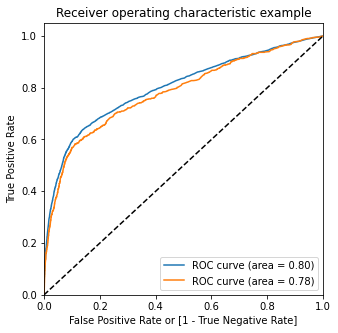

In [114]:
draw_roc(y_train, y_train_pred_gb_prob, y_test, y_test_pred_gb_prob)

In [115]:
print("Accuracy train: ", accuracy_score(y_train, y_train_pred_gb))
print("Accuracy test: ", accuracy_score(y_test, y_test_pred_gb))

Accuracy train:  0.903451431559681
Accuracy test:  0.9048241600209178


### Compare Models

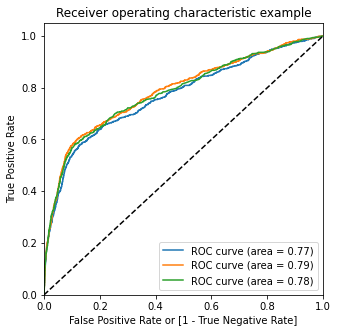

In [116]:
lr_fpr, lr_tpr, lr_thresholds = metrics.roc_curve( y_test, y_test_pred_lr_prob,
                                              drop_intermediate = False )
rf_fpr, rf_tpr, rf_thresholds = metrics.roc_curve( y_test, y_test_pred_rf_prob,
                                              drop_intermediate = False )
gb_fpr, gb_tpr, gb_thresholds = metrics.roc_curve( y_test, y_test_pred_gb_prob,
                                              drop_intermediate = False )
lr_auc_score = metrics.roc_auc_score( y_test, y_test_pred_lr_prob )
rf_auc_score = metrics.roc_auc_score( y_test, y_test_pred_rf_prob )
gb_auc_score = metrics.roc_auc_score( y_test, y_test_pred_gb_prob )
plt.figure(figsize=(5, 5))
plt.plot( lr_fpr, lr_tpr, label='ROC curve (area = %0.2f)' % lr_auc_score )
plt.plot( rf_fpr, rf_tpr, label='ROC curve (area = %0.2f)' % rf_auc_score )
plt.plot( gb_fpr, gb_tpr, label='ROC curve (area = %0.2f)' % gb_auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()